In [ ]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# from sklearn.cross_validation import  cross_val_score
from sklearn.model_selection import train_test_split , cross_val_score , cross_validate,learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics

In [7]:


# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv")
df.head()
df.dropna(how="all",axis=1,inplace=True)
df.dropna(how="all",axis=0,inplace=True)
df.shape
df = df[:9357]
df.tail()
cols = list(df.columns[2:])

In [8]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [9]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
for col in cols:
    if df[col].dtype != 'float64':
        str_x = pd.Series(df[col]).str.replace(',','.')
        float_X = []
        for value in str_x.values:
            fv = float(value)
            float_X.append(fv)

            df[col] = pd.DataFrame(float_X)

df.head()
features=list(df.columns)
features.remove('Date')
features.remove('Time')
features.remove('PT08.S4(NO2)')
X = df[features]
y = df['C6H6(GT)']

In [14]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

(5614, 12) (5614,)


In [15]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 5.931, test: 5.361
R^2 train: 0.996, test: 0.997


In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [17]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))
scores = cross_val_score(regressor, X, y, cv=5)
print ("Average of scores: ", scores.mean())
print ("Cross validation scores: ", scores)

MSE train: 0.005, test: 0.009
R^2 train: 1.000, test: 1.000
R-squared: 1.0
Average of scores:  1.0
Cross validation scores:  [1. 1. 1. 1. 1.]


# Scaling the features using StandardScaler:

In [23]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print ('Cross validation r-squared scores:', scores)
print ('Average cross validation r-squared score:', np.mean(scores))
regressor.fit(X_train, y_train)
print ('Test set r-squared score', regressor.score(X_test, y_test))

Cross validation r-squared scores: [0.99973315 0.99979833 0.99983732 0.99977202 0.9997981 ]
Average cross validation r-squared score: 0.9997877840256948
Test set r-squared score -21319.470951693682


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)
df.columns
feature_names = list(df.columns[2:])
feature_names.remove('PT08.S4(NO2)')

(array([False,  True, False, False,  True, False, False, False, False,
        True,  True,  True]), ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'RH', 'AH'])


<Figure size 432x288 with 0 Axes>

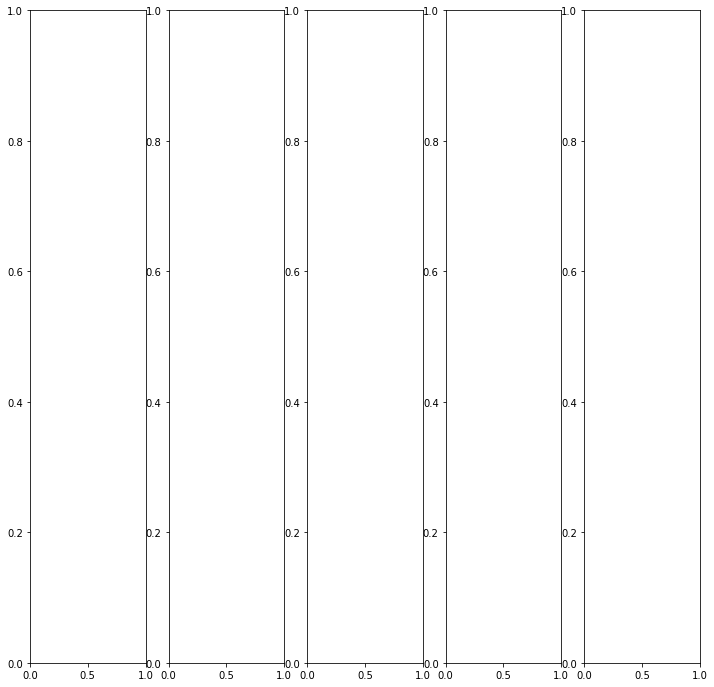

In [25]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import *

fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
print((fs.get_support(),feature_names))

x_min, x_max = X_new[:,0].min(), X_new[:, 0].max()
y_min, y_max = y_train.min(), y_train.max()

fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)

fig.set_size_inches(12,12)

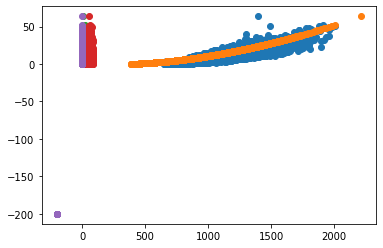

In [27]:
for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.scatter(X_new[:,i],y_train)



In [59]:
from sklearn import linear_model , svm , ensemble
from sklearn.model_selection import KFold,RepeatedKFold

def train_and_evaluate(clf, X_train, y_train):
    clf.fit(X_train, y_train)

    print("Coefficient of determination on training set:", clf.score(X_train, y_train))

    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(n_splits=4, shuffle=True, random_state=i)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print("Average coefficient of determination using 5-fold crossvalidation:", np.mean(scores))


clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
print( clf_sgd.coef_)
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train)
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train)    

Coefficient of determination on training set: -3.950519766736739e+26
Average coefficient of determination using 5-fold crossvalidation: -3.123672050881357e+26
[-1.50500231e+11 -1.68778465e+11 -1.30814059e+10 -1.51393799e+11
  6.41730704e+11  2.69335686e+11  7.78398553e+11 -4.40656023e+11
 -2.40335684e+11  5.76003644e+10 -4.31689486e+11 -5.04421363e+11]
Coefficient of determination on training set: -1.3617033492167947e+26
Average coefficient of determination using 5-fold crossvalidation: -6.67658079192098e+26
Coefficient of determination on training set: -1.6578168199014537e+26
Average coefficient of determination using 5-fold crossvalidation: -3.958128086637905e+26


In [60]:
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)


clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)
imp_features = (np.sort((clf_et.feature_importances_,features),axis=0))
for rank,f in zip(imp_features[0],imp_features[1]):
    print("{0:.3f} <-> {1}".format(float(rank), f))

Coefficient of determination on training set: 0.9999990797025919
Average coefficient of determination using 5-fold crossvalidation: 0.9999990452820722
Coefficient of determination on training set: 0.10382053187184438
Average coefficient of determination using 5-fold crossvalidation: 0.10064310984967567
Coefficient of determination on training set: 0.9960588029843938
Average coefficient of determination using 5-fold crossvalidation: 0.9901433627097671
Coefficient of determination on training set: 0.15302536866671734
Average coefficient of determination using 5-fold crossvalidation: 0.14551041980538842
Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.99998086125939
0.000 <-> CO(GT)
0.001 <-> PT08.S1(CO)
0.000 <-> NMHC(GT)
0.208 <-> C6H6(GT)
0.011 <-> PT08.S2(NMHC)
0.001 <-> NOx(GT)
0.099 <-> PT08.S3(NOx)
0.000 <-> NO2(GT)
0.003 <-> PT08.S5(O3)
0.194 <-> T
0.194 <-> RH
0.291 <-> AH


In [61]:
def measure_performance(X, y, clf, show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True,
                        show_r2_score=False):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(y, y_pred)), "\n")


measure_performance(X_test, y_test, clf_et,
                    show_accuracy=False,
                    show_classification_report=False,
                    show_confusion_matrix=False,
                    show_r2_score=True)

Coefficient of determination:1.000 

